<a href="https://colab.research.google.com/github/arushijha03/ParlayProject/blob/main/business_details_combined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
business_clean_df = pd.read_csv('/content/business_details_cleaned.csv')
combined_df = pd.read_csv('/content/ind_det_n_loan_det_n_inq.csv')

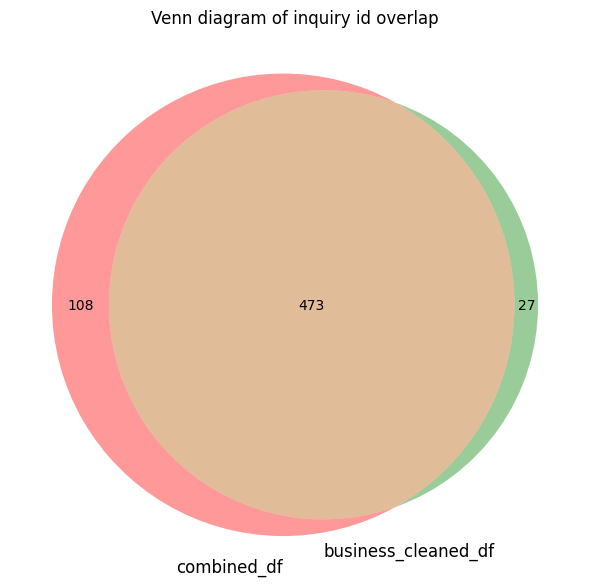

In [4]:
ids_combined  = set(combined_df['inquiry_id'].dropna().astype(str))
ids_business  = set(business_clean_df['inquiry_id'].dropna().astype(str))

# Create the Venn diagram
plt.figure(figsize=(6, 6))
venn2(
    subsets=(ids_combined, ids_business),
    set_labels=('combined_df', 'business_cleaned_df')
)
plt.title('Venn diagram of inquiry id overlap')
plt.tight_layout()
plt.show()

In [5]:
for df in (combined_df, business_clean_df):
    df['inquiry_id'] = df['inquiry_id'].astype(str).str.strip()
    df.drop_duplicates(subset=['inquiry_id'], inplace=True)

# 2) Set the key as the index and keep only IDs present in BOTH (inner)
ind = combined_df.set_index('inquiry_id')
biz = business_clean_df.set_index('inquiry_id')

common_ids = ind.index.intersection(biz.index)
ind = ind.loc[common_ids]
biz = biz.loc[common_ids]           # aligned to the same order

# 3) Start from combined; bring in business columns
#    Overlapping names are replaced by business values; unique business cols are added.
result = biz.copy()
result[ind.columns] = ind
result = result.reset_index()

In [6]:
result.to_csv("final_dataset_business_details_inquiries.csv", index=False)

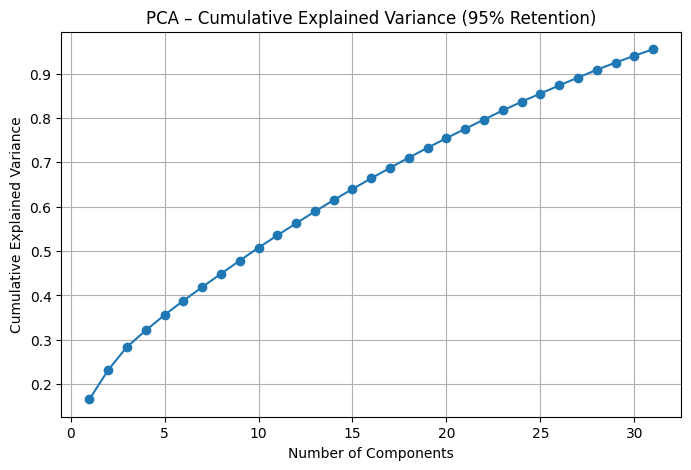

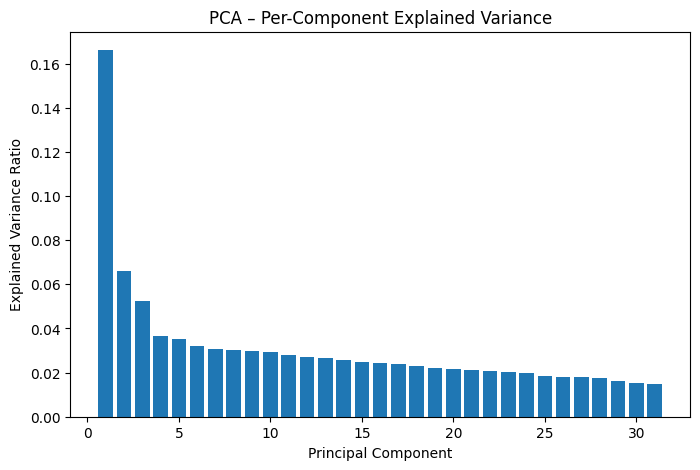

Eigenvalues & Explained Variance


,Component,Eigenvalue,Explained_Variance_Ratio
0,PC1,6.990726,0.166094
1,PC2,2.778110,0.066006
2,PC3,2.200085,0.052272
3,PC4,1.545717,0.036725
4,PC5,1.476303,0.035076
5,PC6,1.345437,0.031966
6,PC7,1.287882,0.030599
7,PC8,1.269040,0.030151
8,PC9,1.243948,0.029555
9,PC10,1.226203,0.029134



Eigenvectors (Principal Component Loadings)


,tax_account_connected,naics_code,fulltime_employees_count,fulltime_employees_annual_payroll,ever_filed_bankruptcy,ongoing_lawsuits,is_only_owner,annual_revenue_year_one,annual_revenue_year_two,annual_revenue_year_three,...,is_associate_with_criminal_history,is_equity_owned_by_lender_or_cdc,is_presenting_prurient_performances,is_defaulted_on_federal_loan,is_engaged_in_political_or_lobbying_activities,is_speculative_in_nature,is_primarily_earning_from_rent_interest_or_investments,is_for_profit_subsidiary_of_nonprofit,is_pawn_shop,is_owned_or_controlled_by_native_american_tribe
PC1,-6.737821e-18,-0.010759,0.321514,0.353805,-0.008411,0.003653,0.046447,0.364730,0.362277,0.354872,...,0.033364,0.006880,-0.002435,-0.010116,0.012176,-0.004840,0.001412,-0.001576,0.045556,0.026464
PC2,6.956625e-18,0.082444,0.014245,0.038257,0.038449,0.051744,-0.047956,0.030488,0.027761,0.029820,...,-0.041757,-0.028063,-0.043842,0.082799,-0.006108,0.028837,0.041686,0.078929,0.017156,0.060215
PC3,6.868721e-17,-0.033823,-0.009793,0.003636,-0.058016,-0.040462,-0.473496,0.011466,0.012211,0.008915,...,-0.057746,-0.017262,0.001054,-0.052127,0.058433,-0.005307,0.003300,-0.014028,-0.047275,-0.004176
PC4,8.963744e-18,-0.081205,0.005103,0.028643,-0.060894,0.030842,-0.061792,0.013935,0.012396,0.006053,...,0.383730,0.232161,-0.200436,0.154253,-0.158821,-0.080513,0.364555,0.212677,0.276931,-0.086429
PC5,-5.184181e-18,0.001413,-0.014727,0.040752,0.230803,0.333548,0.035737,0.030053,0.022590,0.015328,...,-0.109890,0.151452,0.166154,0.005840,0.064016,-0.066790,-0.045048,-0.034143,0.205237,-0.236279
PC6,1.789763e-17,0.148459,-0.033088,-0.017975,0.397935,-0.112101,-0.123377,-0.014823,-0.015022,-0.019409,...,0.241664,0.003445,0.128431,0.398601,-0.080943,0.206070,-0.132290,0.269225,0.025547,0.170977
PC7,-1.965093e-17,-0.108743,0.035160,-0.036270,0.004143,-0.033717,0.135464,-0.021734,-0.000421,-0.000259,...,-0.049251,-0.091000,0.236357,-0.075598,0.331615,-0.193335,0.146708,0.200210,-0.125286,0.153952
PC8,4.772711e-18,0.387624,-0.036600,-0.017863,-0.191982,-0.115163,-0.032901,0.001919,-0.006066,-0.025778,...,-0.105334,0.057549,-0.218114,0.085790,0.203672,0.143739,0.006134,0.017174,0.084882,-0.275902
PC9,1.275477e-17,-0.122145,0.056294,0.024430,0.111387,-0.210221,-0.087925,0.020504,0.008991,-0.008621,...,-0.209074,-0.324571,0.022815,-0.009358,-0.019851,0.185218,-0.016870,0.119451,0.478550,0.099133
PC10,-2.298074e-17,-0.160629,-0.008908,0.011600,-0.035469,-0.160230,0.158418,0.020780,0.009555,0.004402,...,-0.159103,-0.156625,-0.036992,0.147554,-0.138325,0.382394,-0.027061,0.218255,-0.023060,0.101580



Original features: 53
PCA components kept: 31
Explained variance captured: 0.9548


In [7]:
# --- 1) Numeric-only matrix & NaN handling ---
numeric_df = (
    result
    .select_dtypes(include=['number'])        # only numeric columns
    .apply(pd.to_numeric, errors='coerce')    # be strict: coerce anything odd to NaN
)

# Fill NaNs with column means (from numeric_df, not result)
numeric_df = numeric_df.fillna(numeric_df.mean(numeric_only=True))

# (Optional) if any column is constant, StandardScaler will yield zeros; that's okay for PCA.
# You can also drop constant columns if you prefer:
# constant_cols = [c for c in numeric_df.columns if numeric_df[c].nunique(dropna=True) <= 1]
# numeric_df = numeric_df.drop(columns=constant_cols)

# --- 2) Standardize ---
scaler = StandardScaler()
X = scaler.fit_transform(numeric_df)

# --- 3) PCA for 95% variance retention ---
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X)

# --- 4) Scree (cumulative explained variance) ---
plt.figure(figsize=(8, 5))
cumexp = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumexp) + 1), cumexp, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA – Cumulative Explained Variance (95% Retention)')
plt.grid(True)
plt.show()

# (Optional) per-component bars:
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA – Per-Component Explained Variance')
plt.show()

# --- 5) Eigenvalues & Eigenvectors (Loadings) ---
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_  # shape: (n_components, n_features)

eigen_df = pd.DataFrame({
    'Component': [f'PC{i+1}' for i in range(len(eigenvalues))],
    'Eigenvalue': eigenvalues,
    'Explained_Variance_Ratio': pca.explained_variance_ratio_
})

loadings_df = pd.DataFrame(
    eigenvectors,
    index=[f'PC{i+1}' for i in range(eigenvectors.shape[0])],
    columns=numeric_df.columns
)

print("Eigenvalues & Explained Variance")
display(eigen_df)

print("\nEigenvectors (Principal Component Loadings)")
display(loadings_df)

# --- 6) PCA scores DataFrame (optionally keep inquiry_id) ---
scores_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
if 'inquiry_id' in result.columns:
    scores_df['inquiry_id'] = result['inquiry_id'].values

print(f"\nOriginal features: {numeric_df.shape[1]}")
print(f"PCA components kept: {pca.n_components_}")
print(f"Explained variance captured: {pca.explained_variance_ratio_.sum():.4f}")